# Import Libraries

In [10]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

## Data
* data.csv can be downloaded from https://drive.google.com/drive/folders/1XbJmpPcL_HssFBqO43MFwqP2qFwtrT0R?usp=sharing
* Images of all the songs in data.csv is fetched from SPOTIFY API and stored in data_w_img.csv file.
* Already fetched data_w_img.csv can be downloaded from the above drive link.

In [11]:
df = pd.read_csv("../data/data_w_img.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170470 entries, 0 to 170469
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170470 non-null  float64
 1   year              170470 non-null  int64  
 2   acousticness      170470 non-null  float64
 3   artists           170470 non-null  object 
 4   danceability      170470 non-null  float64
 5   duration_ms       170470 non-null  int64  
 6   energy            170470 non-null  float64
 7   explicit          170470 non-null  int64  
 8   id                170470 non-null  object 
 9   instrumentalness  170470 non-null  float64
 10  key               170470 non-null  int64  
 11  liveness          170470 non-null  float64
 12  loudness          170470 non-null  float64
 13  mode              170470 non-null  int64  
 14  name              170470 non-null  object 
 15  popularity        170470 non-null  int64  
 16  release_date      17

In [12]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,img
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,https://i.scdn.co/image/ab67616d0000b2735a7c6e...
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,https://i.scdn.co/image/ab67616d0000b273ab0547...
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,https://i.scdn.co/image/ab67616d0000b2732f1bfe...
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,https://i.scdn.co/image/ab67616d0000b273ab0547...
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,https://i.scdn.co/image/ab67616d0000b273ab0547...


## Observations
Songs can be clustered based on the following audio features:
* valence - Measures how positive a track sounds, from 1 (extremely positive) to 0 (extremely negative).
* year - Year in which the song was released.
* acousticness - Confidence measure of whether a track is acoustic.
* danceability - How suitable a track is for dancing.
* duration_ms - Duration of a track, in milliseconds (ms).
* energy - How intense and active a track is.
* explicit - Whether the song is explicit or not.
* instrumentalness - Proportion of instrumental parts in a track.
* key - Overall key of the track.
* liveness - Detects live audience in a track. Represents the probability that a track was performed live.
* loudness - Overall loudness of the track, in decibels (dB).
* mode - Whether the track is in major mode (1) or minor (0).
* popularity - Current popularity score of the song.
* speechiness - Proportion of spoken words in the track.
* tempo - Overall tempo of a track, in beats per minute (BPM).

### Checking for feature correlation by considering all audio features with popularity as dependent variable.

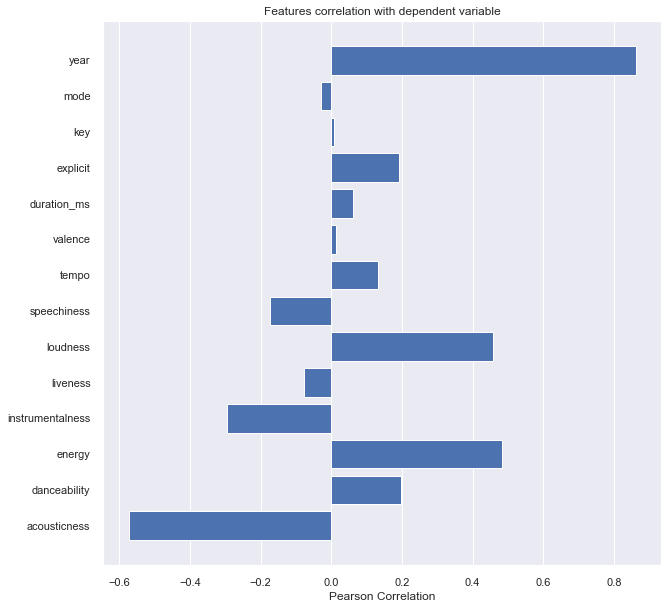

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [13]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                 'liveness', 'loudness', 'speechiness', 'tempo', 
                 'valence', 'duration_ms', 'explicit', 'key',
                 'mode', 'year']

X, y = df[feature_names], df['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(10,10)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

With data grouped by decade, we can understand how the overall sound of music has changed from 1921 to 2020.

<AxesSubplot:xlabel='decade', ylabel='count'>

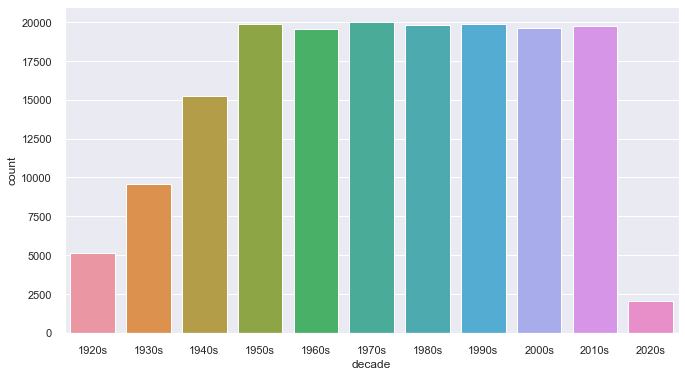

In [14]:
def get_decade(year):
    """Get decade of the year

    Parameters: 
        year (int): Numerical year value
        
    Returns: 
        decade: Numerical decade value
    """

    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

df['decade'] = df['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(df['decade'])

# Clustering songs with K-Means

Songs in the dataset is divided into 20 clusters using the K-Means clustering algorithm based on the numerical audio features of each song.

In [15]:
from joblib import dump

song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=False))
                                 ], verbose=False)

# Use the numerical features of the dataset to cluster songs.
X = df.select_dtypes(np.number)
number_cols = list(X.columns)

song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
df['cluster_label'] = song_cluster_labels

# Dump the fitted scaler and song_data.csv which contains cluster_labels.
dump(song_cluster_pipeline.steps[0][1], '../data/std_scaler.bin')
df.to_csv('../data/song_data.csv', index=False)